In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
nemo = pd.read_csv('../Resources/GEM5_NEMO_FULL_LDC.csv')
nemo['LDC_SST_GEM5_NEMO'] = nemo['LDC_SST_GEM5_NEMO'] - 273.15
nemo['MON'] = pd.to_datetime(nemo['MON'], format = '%H%M %d %b %Y')
nemo['START'] = nemo['MON'].dt.month
nemo['TARGET'] = ((nemo['START'] + nemo['L']).astype(int))%12
nemo['TARGET'] = nemo['TARGET'].apply(lambda x: 12 if x == 0 else x)

# Calculate the mean grouped by 'L' and 'START'
nemo_mean = nemo.groupby(['L', 'START'])['LDC_SST_GEM5_NEMO'].mean().reset_index()
nemo_mean.rename(columns={'LDC_SST_GEM5_NEMO': 'MEAN_SST_GEM5_NEMO'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START'
nemo_var = nemo.groupby(['L', 'START'])['LDC_SST_GEM5_NEMO'].var().reset_index()
nemo_var.rename(columns={'LDC_SST_GEM5_NEMO': 'VAR_SST_GEM5_NEMO'}, inplace=True)

# Merge the mean and variance DataFrames
nemo_stat = pd.merge(nemo_mean, nemo_var, on=['L', 'START'])
nemo_stat.head(20)

month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
nemo_stat['TARGET'] = ((nemo_stat['START'] + nemo_stat['L']).astype(int))%12
nemo_stat['TARGET'] = nemo_stat['TARGET'].apply(lambda x: 12 if x == 0 else x)
nemo_stat['SZN'] = nemo_stat['TARGET'].map(month_to_season)

new_order = ['L','START','TARGET','SZN','MEAN_SST_GEM5_NEMO','VAR_SST_GEM5_NEMO']
nemo_stat = nemo_stat[new_order]

nemo_stat.to_csv('../Resources/nemo_stat.csv', index=False)

lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
nemo_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_nemo = nemo_stat[nemo_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_nemo.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_nemo.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_nemo = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    nemo_stat_dfs[f'lead{lead}'] = filtered_nemo
    
nemo_stat_dfs['lead1']


,L,START,TARGET,SZN,MEAN_SST_GEM5_NEMO,VAR_SST_GEM5_NEMO
0,1.5,1,2,JFM,25.934020,1.418065
1,1.5,2,3,FMA,26.321293,1.022595
2,1.5,3,4,MAM,26.660290,0.726993
3,1.5,4,5,AMJ,26.848907,0.452375
4,1.5,5,6,MJJ,26.580923,0.589151
5,1.5,6,7,JJA,26.110330,0.805304
6,1.5,7,8,JAS,25.923743,1.032694
7,1.5,8,9,ASO,25.711320,1.264804
8,1.5,9,10,SON,25.770110,1.538334
9,1.5,10,11,OND,25.825127,1.946132


In [4]:
CM4i_IC3 = pd.read_csv('../Resources/CanCM4i_IC3_FULL_LDC.csv')
CM4i_IC3['LDC_SST_CanCM4i_IC3'] = CM4i_IC3['LDC_SST_CanCM4i_IC3'] - 273.15
CM4i_IC3['MON'] = pd.to_datetime(CM4i_IC3['MON'], format = '%H%M %d %b %Y')
CM4i_IC3['START'] = CM4i_IC3['MON'].dt.month
CM4i_IC3['TARGET'] = ((CM4i_IC3['START'] + CM4i_IC3['L']).astype(int))%12
CM4i_IC3['TARGET'] = CM4i_IC3['TARGET'].apply(lambda x: 12 if x == 0 else x)

# Calculate the mean grouped by 'L' and 'START'
CM4i_IC3_mean = CM4i_IC3.groupby(['L', 'START'])['LDC_SST_CanCM4i_IC3'].mean().reset_index()
CM4i_IC3_mean.rename(columns={'LDC_SST_CanCM4i_IC3': 'MEAN_SST_CanCM4i_IC3'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START'
CM4i_IC3_var = CM4i_IC3.groupby(['L', 'START'])['LDC_SST_CanCM4i_IC3'].var().reset_index()
CM4i_IC3_var.rename(columns={'LDC_SST_CanCM4i_IC3': 'VAR_SST_CanCM4i_IC3'}, inplace=True)

# Merge the mean and variance DataFrames
CM4i_IC3_stat = pd.merge(CM4i_IC3_mean, CM4i_IC3_var, on=['L', 'START'])
CM4i_IC3_stat.head(20)

month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
CM4i_IC3_stat['TARGET'] = ((CM4i_IC3_stat['START'] + CM4i_IC3_stat['L']).astype(int))%12
CM4i_IC3_stat['TARGET'] = CM4i_IC3_stat['TARGET'].apply(lambda x: 12 if x == 0 else x)
CM4i_IC3_stat['SZN'] = CM4i_IC3_stat['TARGET'].map(month_to_season)

new_order = ['L','START','TARGET','SZN','MEAN_SST_CanCM4i_IC3','VAR_SST_CanCM4i_IC3']
CM4i_IC3_stat = CM4i_IC3_stat[new_order]

CM4i_IC3_stat.to_csv('../Resources/CM4i_IC3_stat.csv', index=False)

lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
CM4i_IC3_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_CM4i_IC3 = CM4i_IC3_stat[CM4i_IC3_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_CM4i_IC3.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_CM4i_IC3.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_CM4i_IC3 = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    CM4i_IC3_stat_dfs[f'lead{lead}'] = filtered_CM4i_IC3
    
CM4i_IC3_stat_dfs['lead1']

,L,START,TARGET,SZN,MEAN_SST_CanCM4i_IC3,VAR_SST_CanCM4i_IC3
0,1.5,1,2,JFM,26.418053,1.425561
1,1.5,2,3,FMA,27.109423,0.785997
2,1.5,3,4,MAM,27.752250,0.361825
3,1.5,4,5,AMJ,27.894950,0.240200
4,1.5,5,6,MJJ,27.494310,0.451645
5,1.5,6,7,JJA,26.813137,0.831476
6,1.5,7,8,JAS,26.334730,1.083070
7,1.5,8,9,ASO,26.031880,1.129433
8,1.5,9,10,SON,26.153280,1.391048
9,1.5,10,11,OND,26.251820,1.703774


In [6]:
#access cansips ic3

canada_stat = pd.read_csv('../Resources/canada_stat.csv')

lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
canada_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_canada = canada_stat[canada_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_canada.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_canada.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_canada = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    canada_stat_dfs[f'lead{lead}'] = filtered_canada

canada_stat_dfs['lead5']

,L,START,TARGET,SZN,MEAN_SST_CanSIPS_IC3,VAR_SST_CanSIPS_IC3
0,5.5,9,2,JFM,25.733917,1.521570
1,5.5,10,3,FMA,25.722900,1.429174
2,5.5,11,4,MAM,25.857860,1.132803
3,5.5,12,5,AMJ,26.018883,0.783439
4,5.5,1,6,MJJ,26.087257,0.485536
5,5.5,2,7,JJA,25.801903,0.515852
6,5.5,3,8,JAS,25.513733,0.719865
7,5.5,4,9,ASO,25.316603,1.015549
8,5.5,5,10,SON,25.448850,1.343591
9,5.5,6,11,OND,25.602047,1.598643


In [7]:
#code that obtains the observed data and creates a doubled df ready for plotting
obs_nino3_4 = pd.read_csv('../Resources/obs_nino3_4.csv')

bottom_row = obs_nino3_4.iloc[1:]
rest_of_df = obs_nino3_4.iloc[:1]
        
obs_nino3_4 = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)

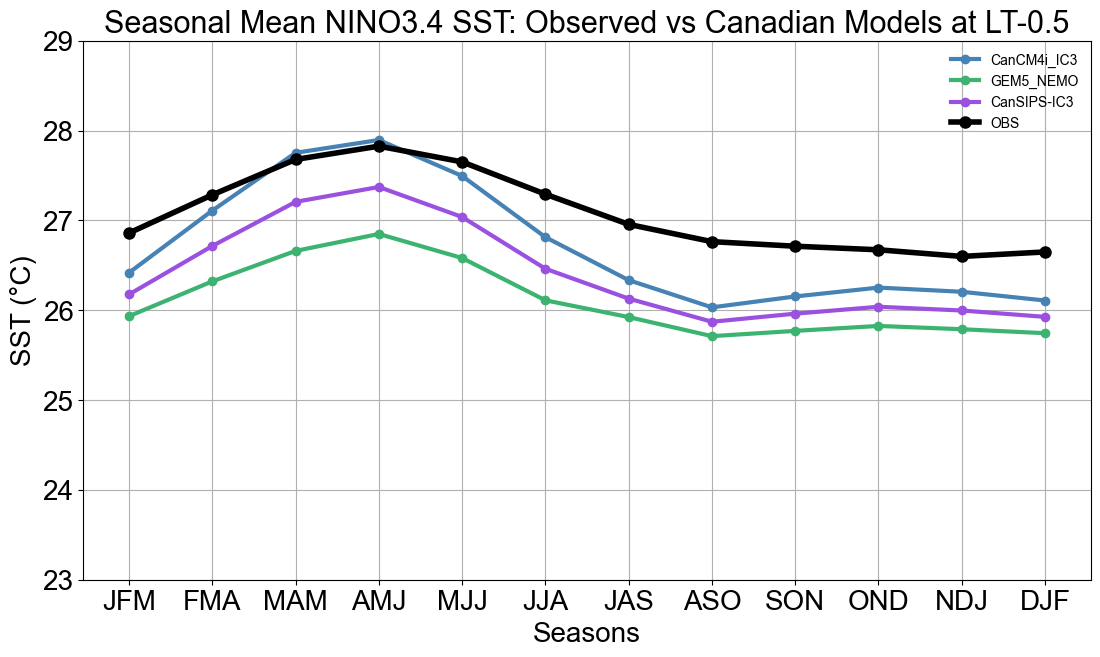

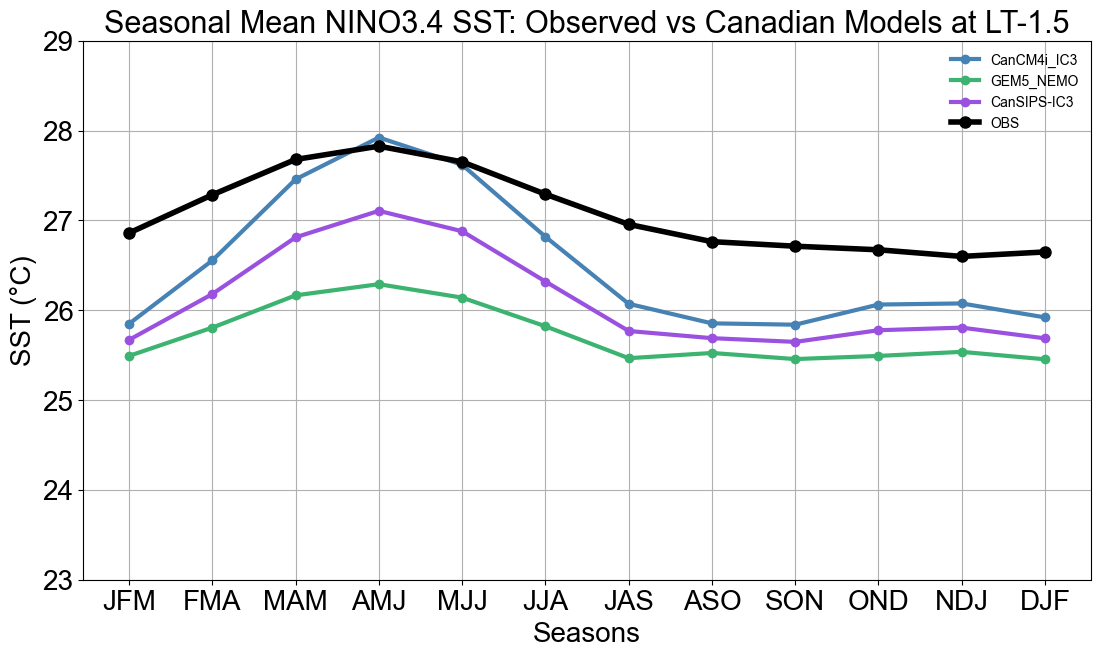

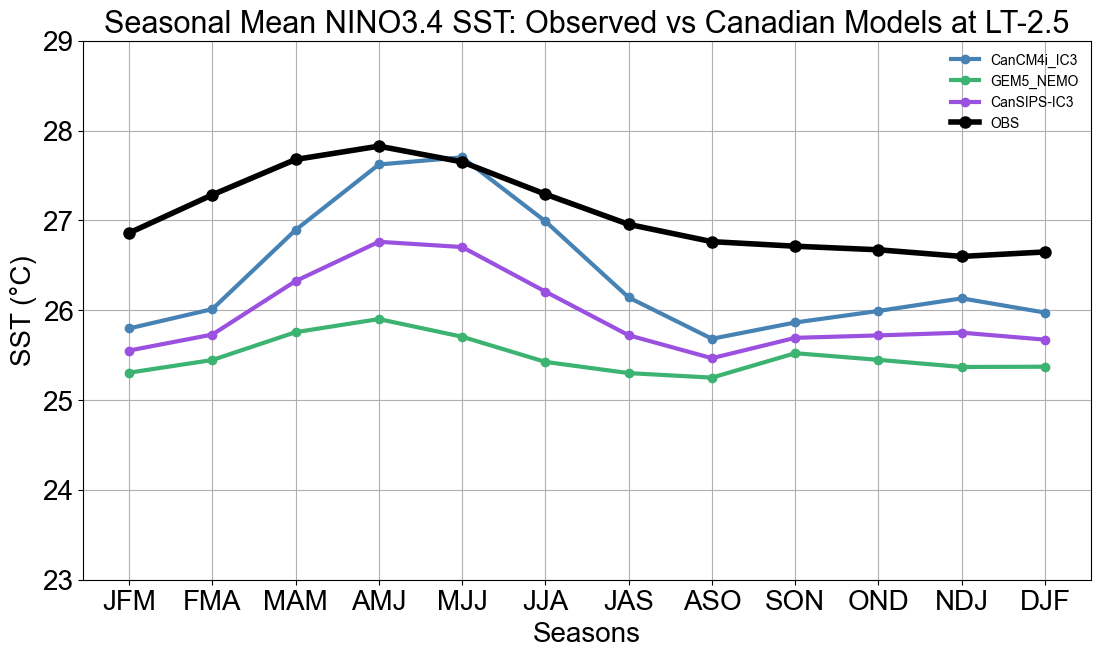

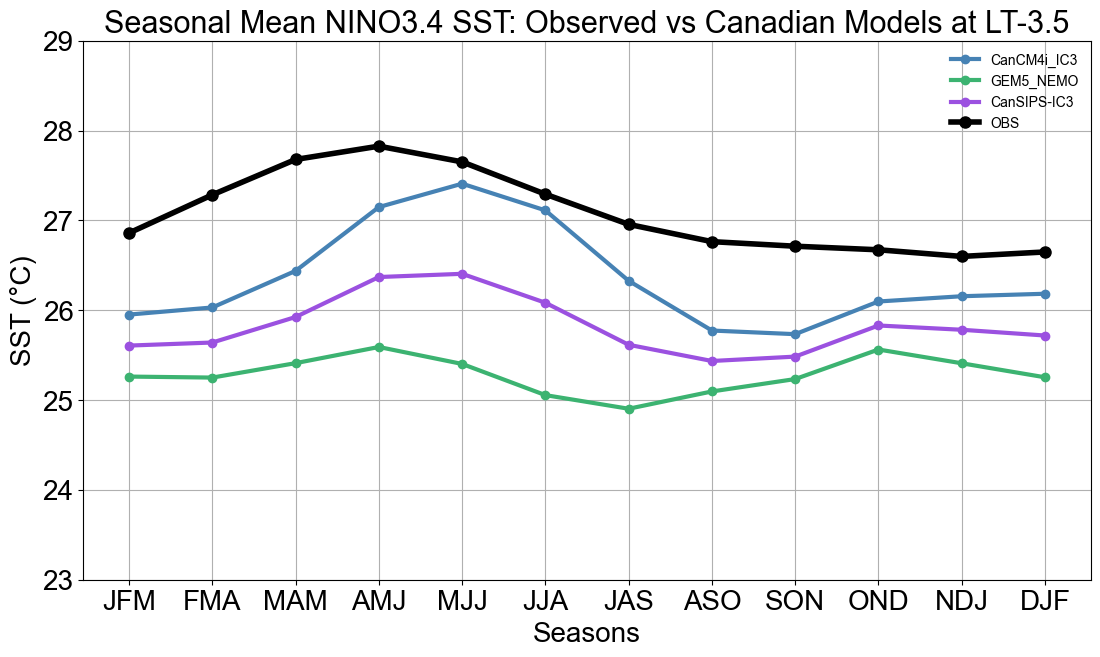

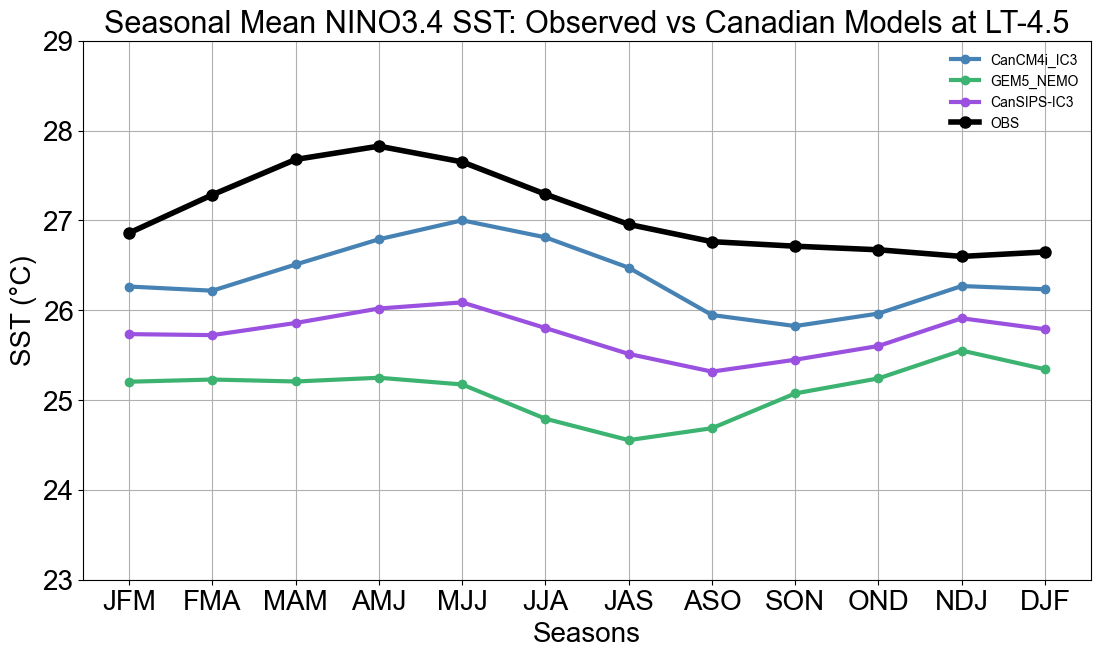

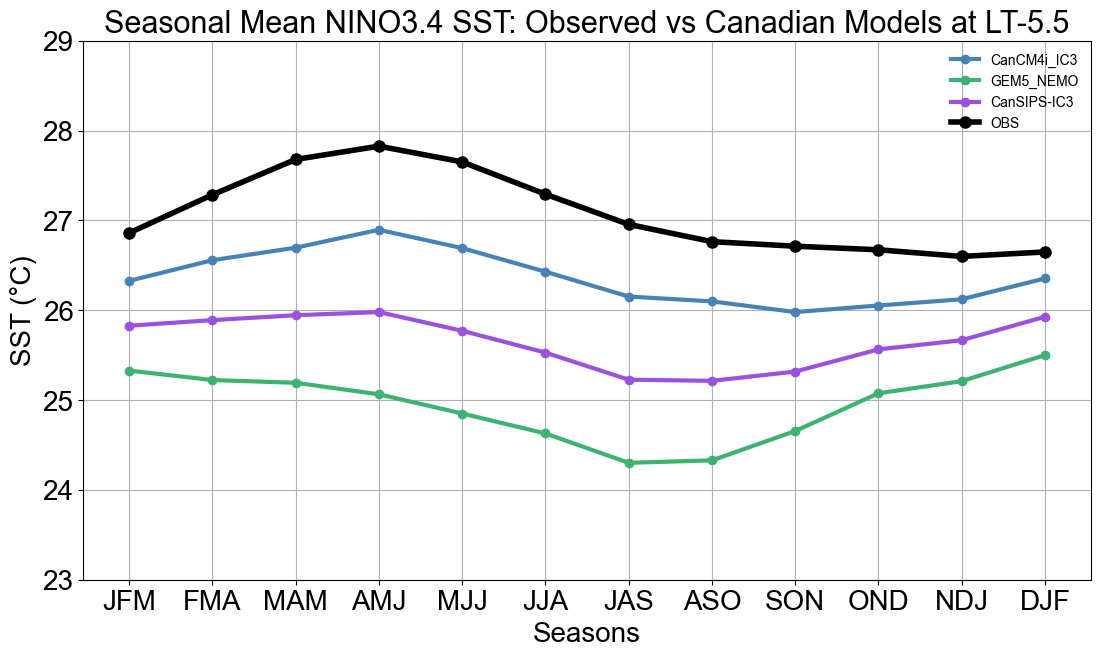

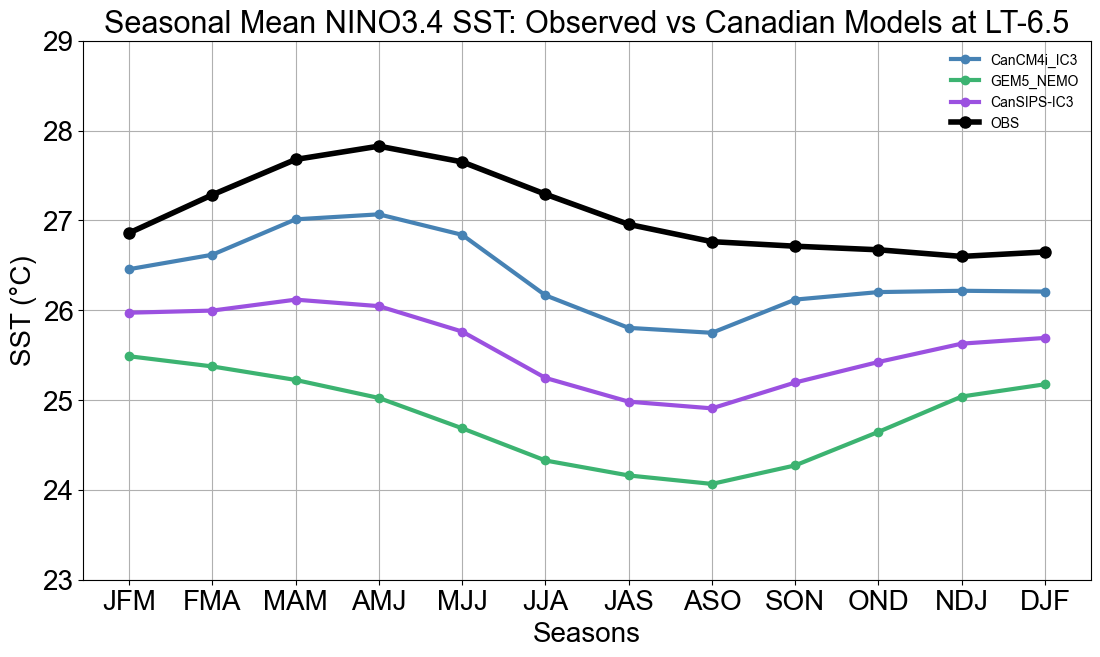

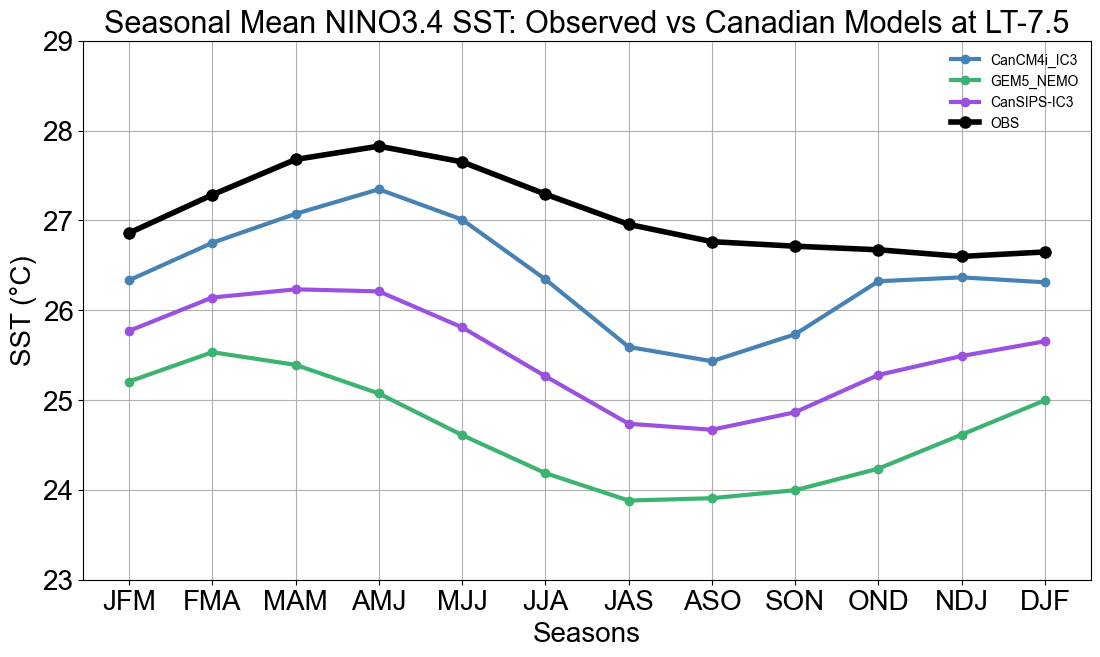

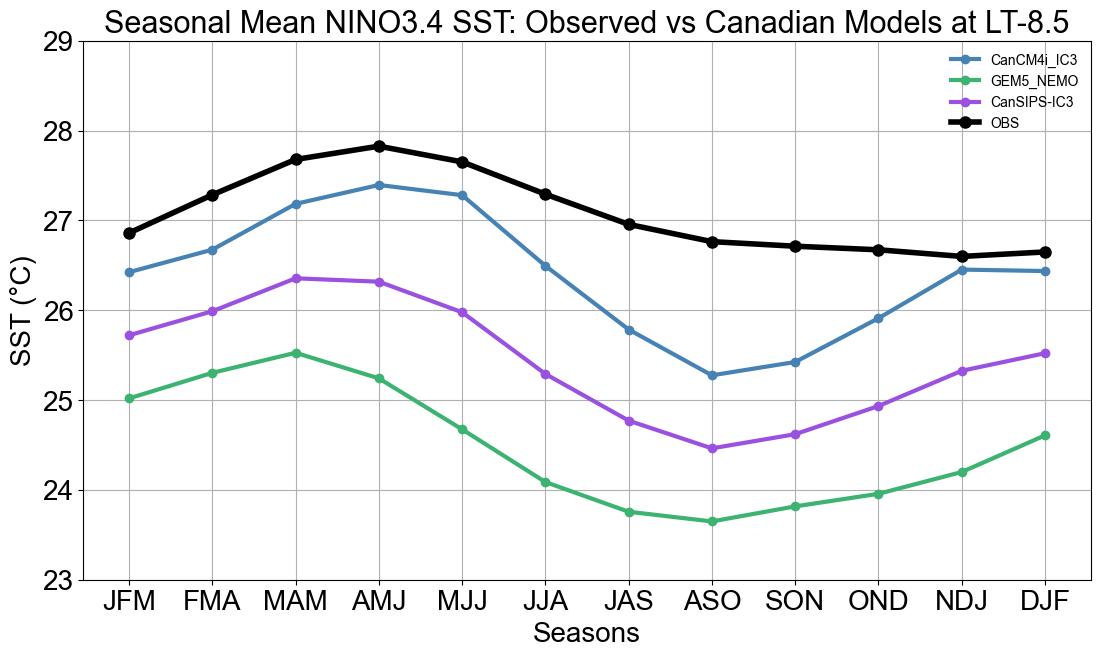

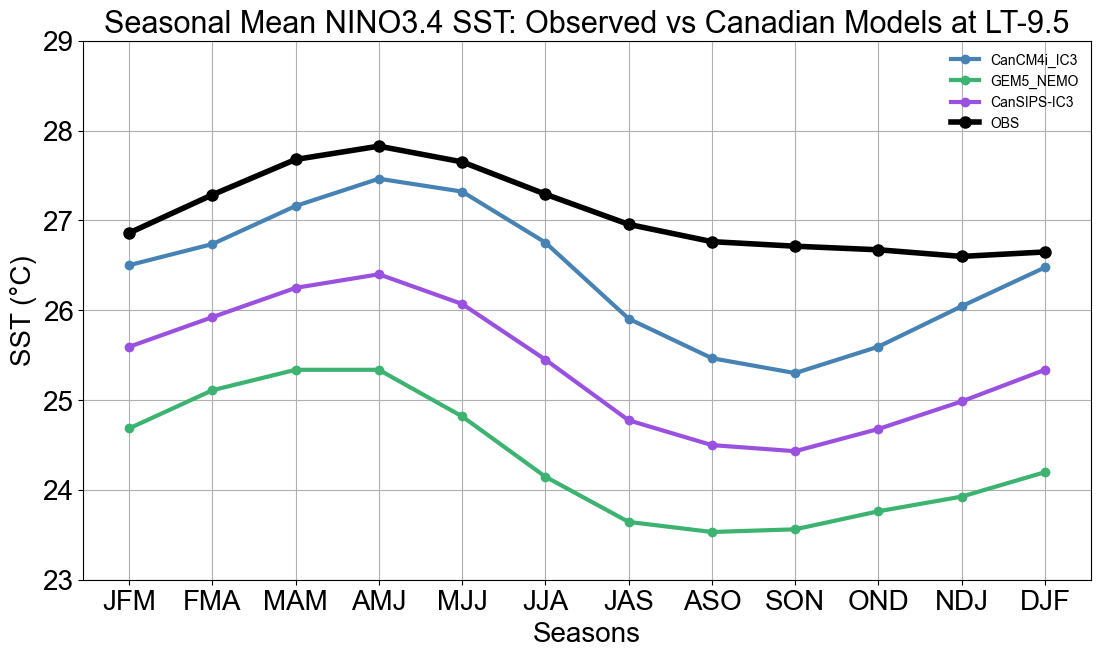

In [16]:
#follow this convention for all LDC graphs. 
def multimodel_sst_visualizer(lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    
    
    plt.plot(CM4i_IC3_stat_dfs[f'lead{lead}']['SZN'], CM4i_IC3_stat_dfs[f'lead{lead}']['MEAN_SST_CanCM4i_IC3'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'CanCM4i_IC3')
    plt.plot(nemo_stat_dfs[f'lead{lead}']['SZN'], nemo_stat_dfs[f'lead{lead}']['MEAN_SST_GEM5_NEMO'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'GEM5_NEMO')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['MEAN_SST_CanSIPS_IC3'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC3')
    plt.plot(obs_nino3_4['SZN'], obs_nino3_4['NINO3.4_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    # Customize the plot
    plt.title(f'Seasonal Mean NINO3.4 SST: Observed vs Canadian Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=23, ymax=29)
    plt.savefig(f'../Plots/Mean/seasonal_mean_Canadian_lead{lead}.png', format='png')
    # Show the plot
    plt.show()

i = 1
while i < 11:
    multimodel_sst_visualizer(i)
    i += 1

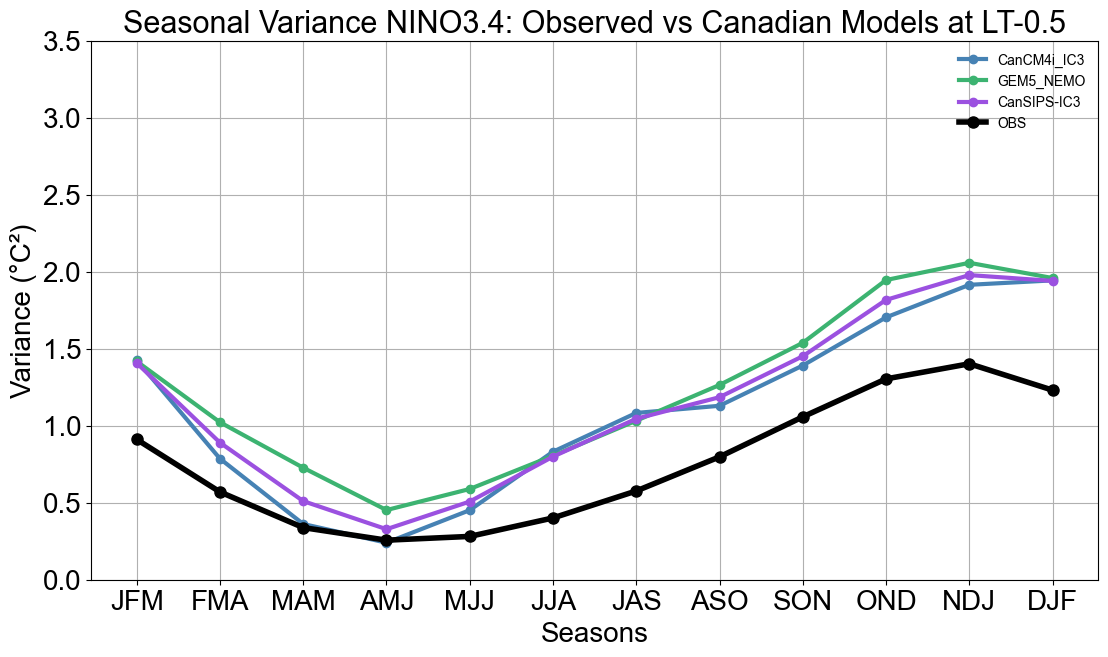

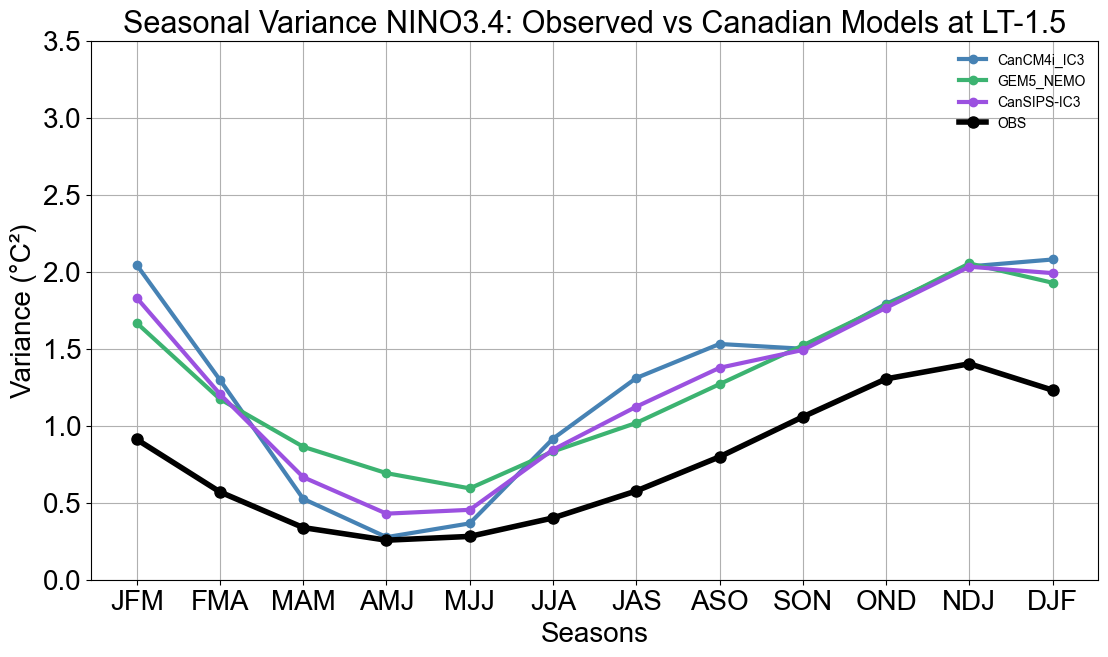

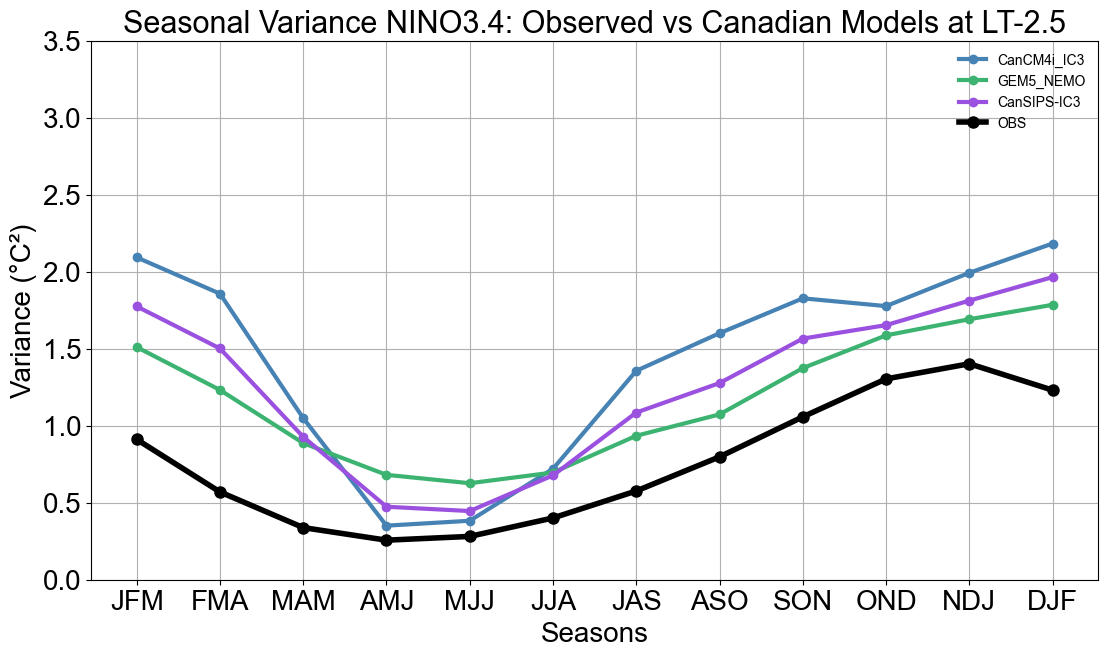

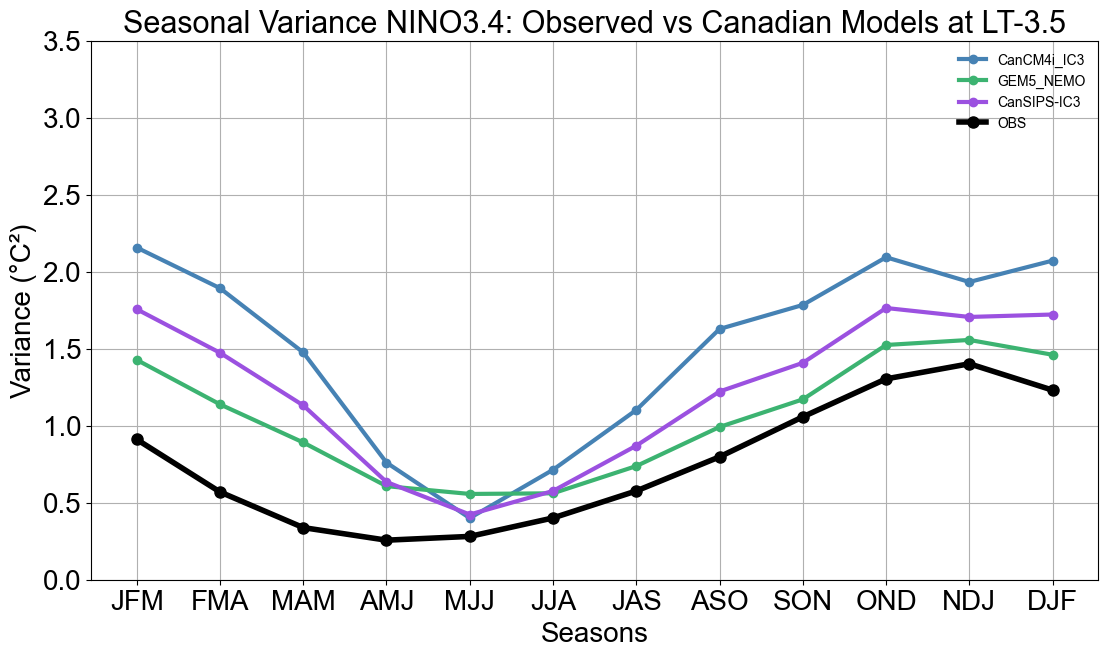

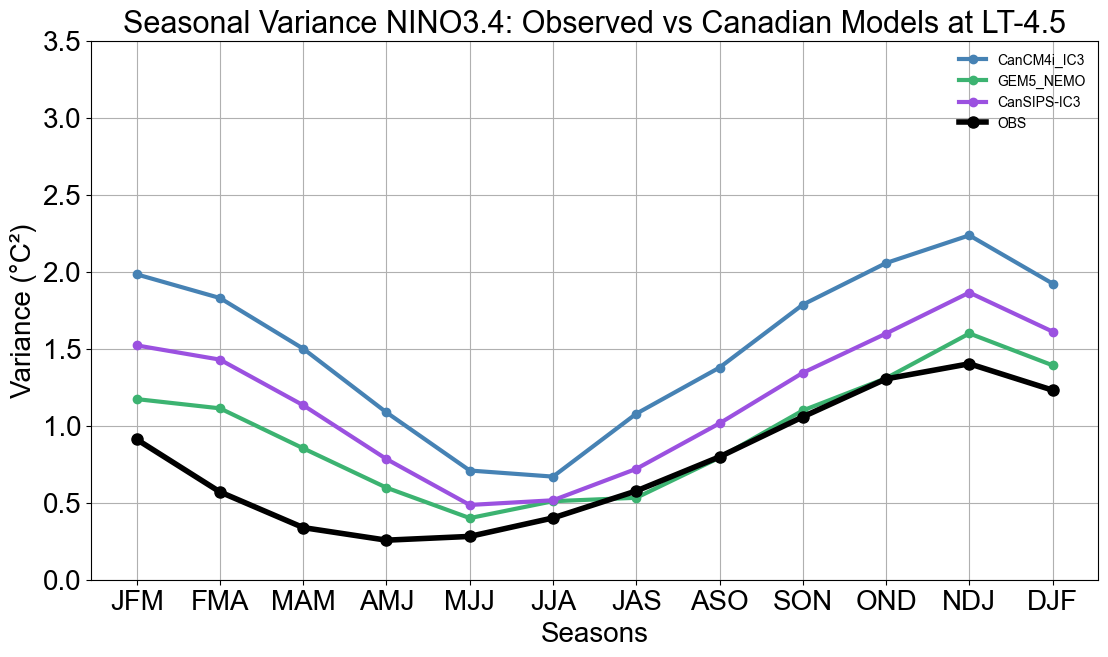

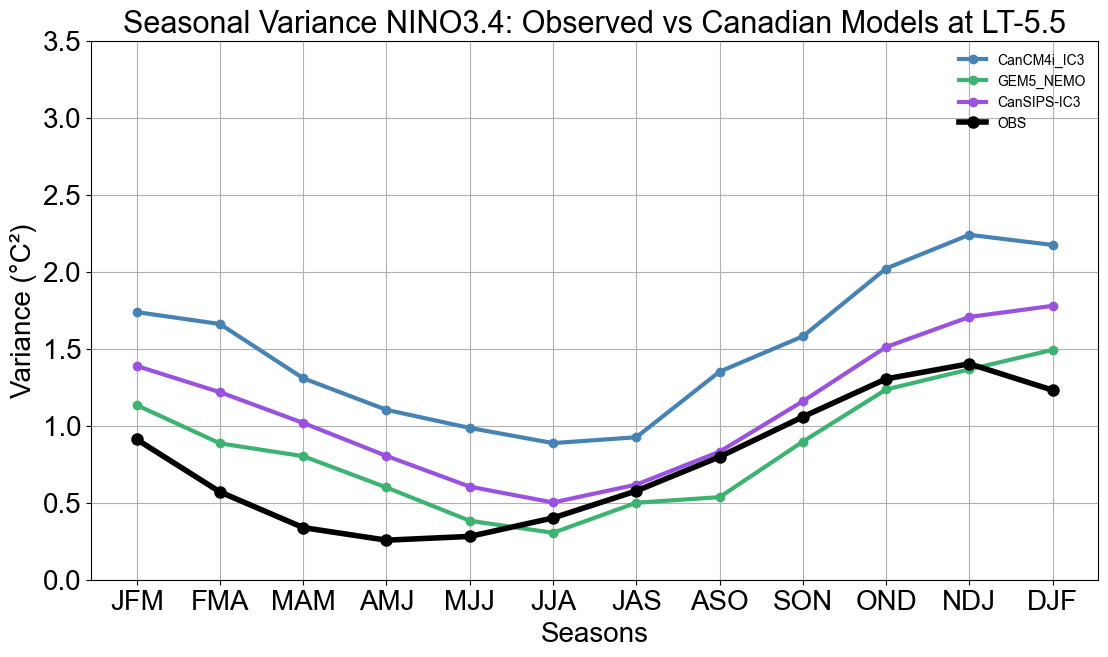

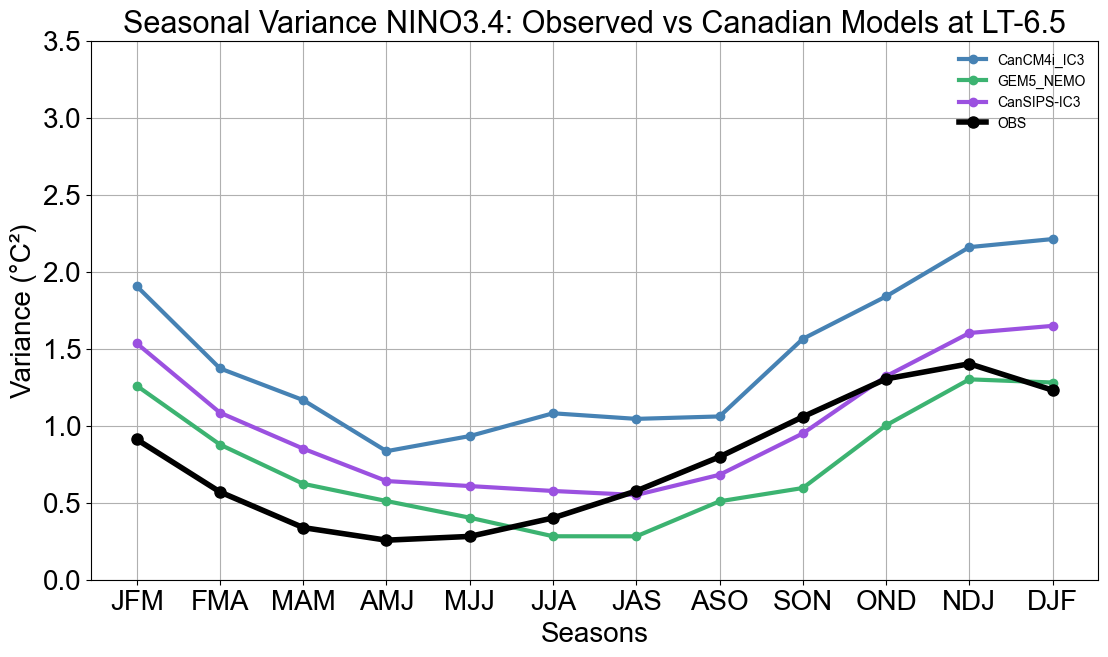

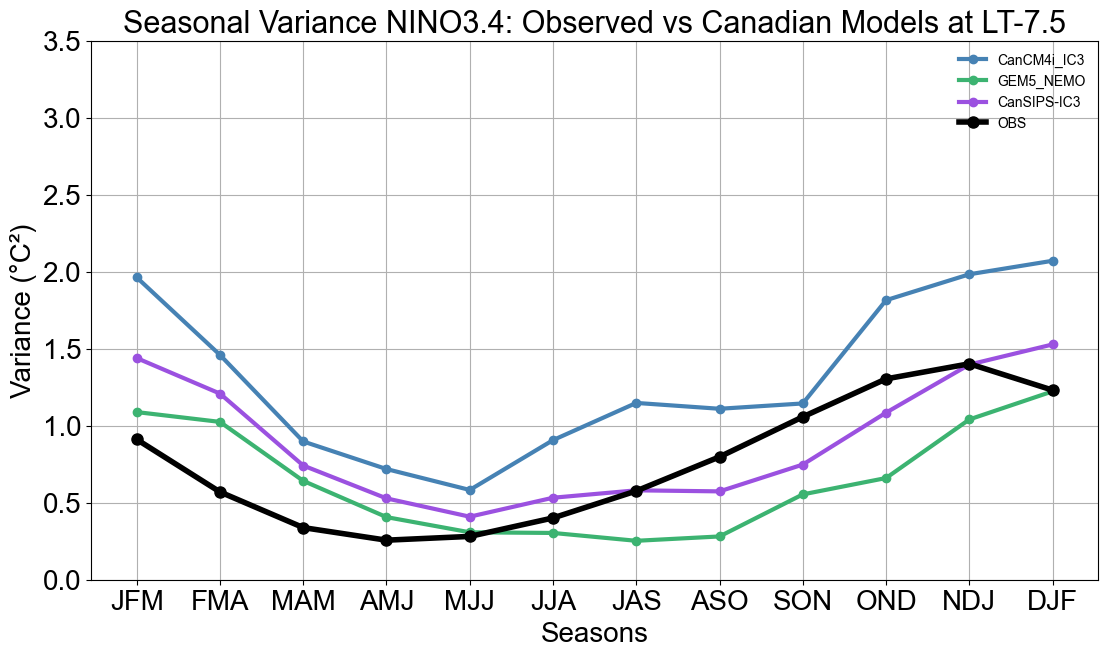

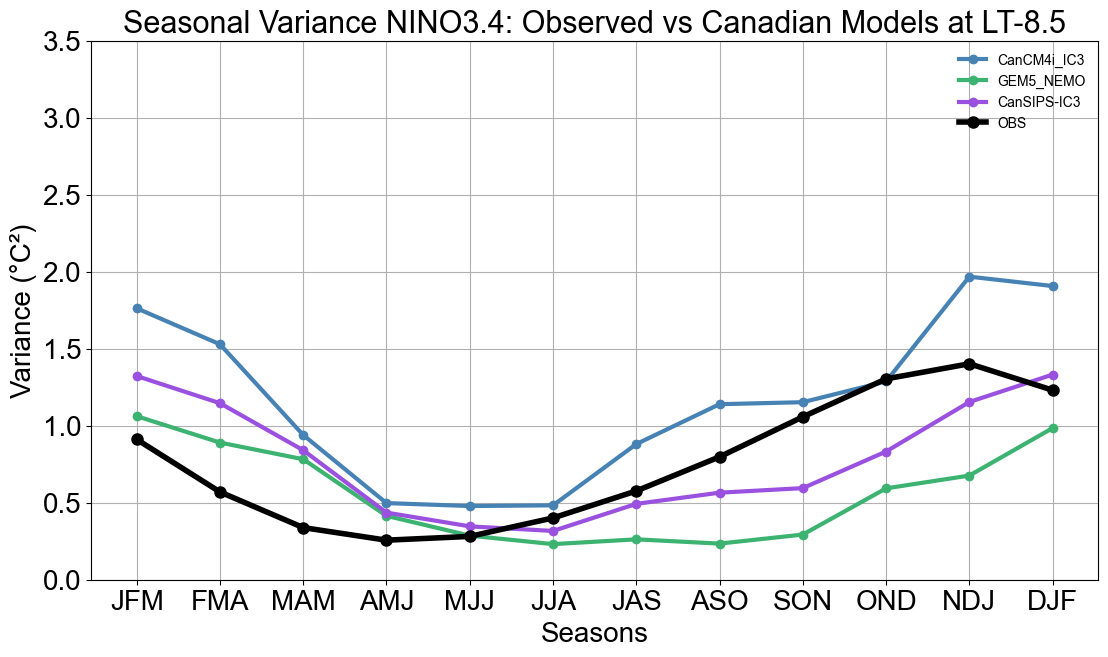

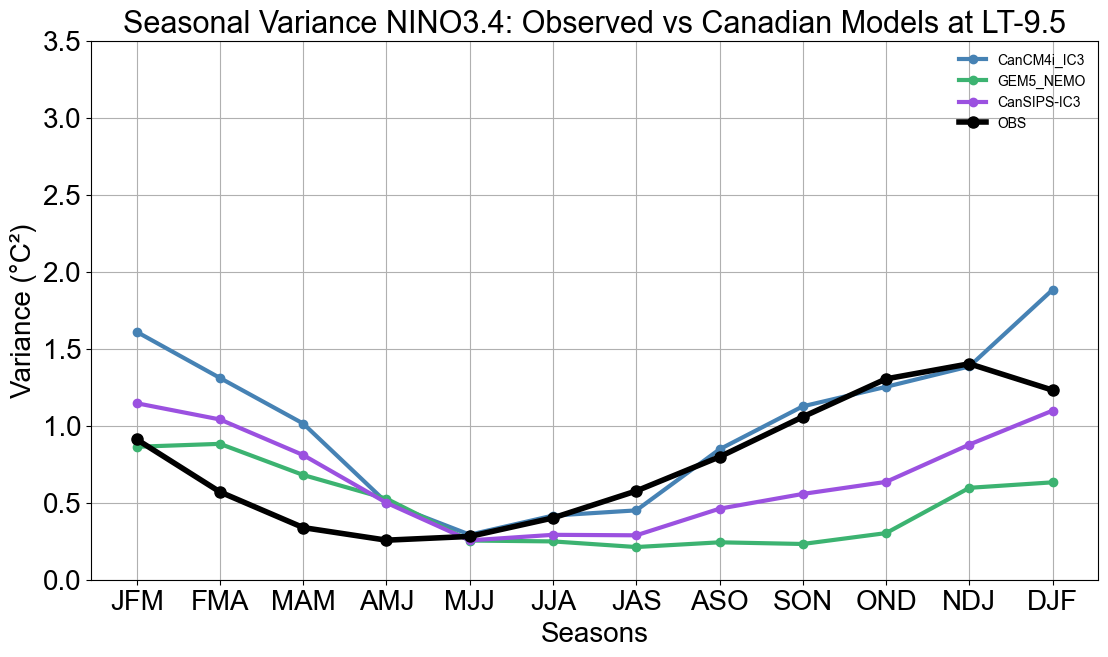

In [14]:
def multimodel_var_visualizer(lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))

    
    
    plt.plot(CM4i_IC3_stat_dfs[f'lead{lead}']['SZN'], CM4i_IC3_stat_dfs[f'lead{lead}']['VAR_SST_CanCM4i_IC3'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'CanCM4i_IC3')
    plt.plot(nemo_stat_dfs[f'lead{lead}']['SZN'], nemo_stat_dfs[f'lead{lead}']['VAR_SST_GEM5_NEMO'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'GEM5_NEMO')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['VAR_SST_CanSIPS_IC3'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC3')
    plt.plot(obs_nino3_4['SZN'], obs_nino3_4['VARIANCE_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    # Customize the plot
    plt.title(f'Seasonal Variance NINO3.4: Observed vs Canadian Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons',size = 20)
    plt.ylabel('Variance (°C²)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=0, ymax=3.5)
    # Show the plot
    plt.savefig(f'../Plots/seasonal_variance_Canadian_lead{lead}.png', format='png')
    plt.show()
i = 1
while i < 11:
    multimodel_var_visualizer(i)
    i += 1
